In [1]:
import pandas as pd

In [2]:
df = pd.read_table('wr88125.txt', sep = ';', 
                   names = ['index', 'year', 'month', 'day', 'min_t', 'average_t', 'max_t', 'rainfall'])
df

,index,year,month,day,min_t,average_t,max_t,rainfall
0,29838,1960,1,1,-6.9,-5.4,-3.8,0.1
1,29838,1960,1,2,-14.4,-10.0,-6.7,0.5
2,29838,1960,1,3,-21.7,-19.7,-13.4,0.0
3,29838,1960,1,4,-24.9,-21.4,-16.9,0.0
4,29838,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...,...
22276,29838,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,29838,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,29838,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,29838,2020,12,30,-21.8,-13.6,-9.9,0.8


In [3]:
df.dtypes

index         int64
year          int64
month         int64
day           int64
min_t        object
average_t    object
max_t        object
rainfall     object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      22281 non-null  int64 
 1   year       22281 non-null  int64 
 2   month      22281 non-null  int64 
 3   day        22281 non-null  int64 
 4   min_t      22281 non-null  object
 5   average_t  22281 non-null  object
 6   max_t      22281 non-null  object
 7   rainfall   22281 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.4+ MB


In [5]:
df.dtypes

index         int64
year          int64
month         int64
day           int64
min_t        object
average_t    object
max_t        object
rainfall     object
dtype: object

In [6]:
df['min_t'] = df['min_t'].str.replace(' ', '')
df['average_t'] = df['average_t'].str.replace(' ', '')
df['max_t'] = df['max_t'].str.replace(' ', '')
df['rainfall'] = df['rainfall'].str.replace(' ', '')

In [7]:
df = df.apply(pd.to_numeric)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      22281 non-null  int64  
 1   year       22281 non-null  int64  
 2   month      22281 non-null  int64  
 3   day        22281 non-null  int64  
 4   min_t      22255 non-null  float64
 5   average_t  22255 non-null  float64
 6   max_t      21717 non-null  float64
 7   rainfall   22253 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.4 MB


In [9]:
del df['index'] # Удаление столбца index

In [10]:
df

,year,month,day,min_t,average_t,max_t,rainfall
0,1960,1,1,-6.9,-5.4,-3.8,0.1
1,1960,1,2,-14.4,-10.0,-6.7,0.5
2,1960,1,3,-21.7,-19.7,-13.4,0.0
3,1960,1,4,-24.9,-21.4,-16.9,0.0
4,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,2020,12,30,-21.8,-13.6,-9.9,0.8


Объедините столбцы «Год», «Месяц» и «День» в один столбец

In [11]:
df['date'] = df['year'].astype('str') + '-' + df['month'].astype('str') + '-' + df['day'].astype('str') # самый простой способ
df['date'] = pd.to_datetime(df['date'])

In [12]:
df

,year,month,day,min_t,average_t,max_t,rainfall,date
0,1960,1,1,-6.9,-5.4,-3.8,0.1,1960-01-01
1,1960,1,2,-14.4,-10.0,-6.7,0.5,1960-01-02
2,1960,1,3,-21.7,-19.7,-13.4,0.0,1960-01-03
3,1960,1,4,-24.9,-21.4,-16.9,0.0,1960-01-04
4,1960,1,5,-18.3,-8.0,-3.3,4.1,1960-01-05
...,...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0,2020-12-27
22277,2020,12,28,-40.1,-34.2,-25.5,0.0,2020-12-28
22278,2020,12,29,-28.2,-23.9,-18.6,0.0,2020-12-29
22279,2020,12,30,-21.8,-13.6,-9.9,0.8,2020-12-30


In [13]:
df.dtypes

year                  int64
month                 int64
day                   int64
min_t               float64
average_t           float64
max_t               float64
rainfall            float64
date         datetime64[ns]
dtype: object

В данных за какой год больше всего пропусков?

In [14]:
s = pd.Series(index = range(1960,2021), dtype = float)
for i in range(1960, 2021):
    s[i] = df[df['year'] == i].isnull().sum().sum()

In [15]:
s

1960    206.0
1961    334.0
1962      0.0
1963      2.0
1964      0.0
        ...  
2016      0.0
2017      0.0
2018      0.0
2019      0.0
2020      0.0
Length: 61, dtype: float64

In [16]:
s.idxmax()

1961

In [17]:
s[s == s.max()].index

Int64Index([1961], dtype='int64')

In [18]:
df[df['year'] == 1960].isnull().sum()

year           0
month          0
day            0
min_t          0
average_t      0
max_t        206
rainfall       0
date           0
dtype: int64

In [19]:
df[df['year'] == 1960].isnull().sum().sum()

206

In [20]:
df[df['year'] == 1960].isnull().sum() 

year           0
month          0
day            0
min_t          0
average_t      0
max_t        206
rainfall       0
date           0
dtype: int64

In [21]:
df['new'] = df['max_t']-df['min_t'] # Размах температур

Для каждого наблюдения рассчитайте количество предшествующих ему дней без осадков

In [22]:
import numpy as np # Импортируем NumPy

arr = np.full(len(df["rainfall"]), 0) # Создаем одномерный массив такой же длины как rainfall, но заполненный нулями

for i in range(1, len(df["rainfall"])): # Запускаем цикл 
    if df["rainfall"][i-1] == 0: # если количество осадков в предыдущий день равно 0
        arr[i] = arr[i-1]+1 # То прибавляем к предыдущему значению счетчика 1
    else:
        arr[i] = 0 # иначе записываем 0
df["without_cond"] = arr
df.head(20)

,year,month,day,min_t,average_t,max_t,rainfall,date,new,without_cond
0,1960,1,1,-6.9,-5.4,-3.8,0.1,1960-01-01,3.1,0
1,1960,1,2,-14.4,-10.0,-6.7,0.5,1960-01-02,7.7,0
2,1960,1,3,-21.7,-19.7,-13.4,0.0,1960-01-03,8.3,0
3,1960,1,4,-24.9,-21.4,-16.9,0.0,1960-01-04,8.0,1
4,1960,1,5,-18.3,-8.0,-3.3,4.1,1960-01-05,15.0,2
5,1960,1,6,-10.9,-8.0,-4.4,1.5,1960-01-06,6.5,0
6,1960,1,7,-10.7,-9.8,-8.9,0.9,1960-01-07,1.8,0
7,1960,1,8,-15.2,-10.8,-8.4,0.8,1960-01-08,6.8,0
8,1960,1,9,-16.6,-13.5,-9.8,0.1,1960-01-09,6.8,0
9,1960,1,10,-21.3,-17.8,-14.1,0.0,1960-01-10,7.2,0


In [23]:
df[df["without_cond"] == df["without_cond"].max()] # Самый длинный период засухи

,year,month,day,min_t,average_t,max_t,rainfall,date,new,without_cond
7356,1980,2,21,-6.4,-2.9,0.0,0.5,1980-02-21,6.4,27
13616,1997,4,12,8.0,10.6,19.6,0.5,1997-04-12,11.6,27


Для каждого года вычислите среднегодовую температуру и общее количество
осадков. Запишите результаты в объекты Series.

In [24]:
s_1 = df.groupby('year')['average_t'].mean() 
s_1.head()

year
1960   -0.113934
1961    2.424384
1962    3.326849
1963    3.461264
1964    2.291803
Name: average_t, dtype: float64

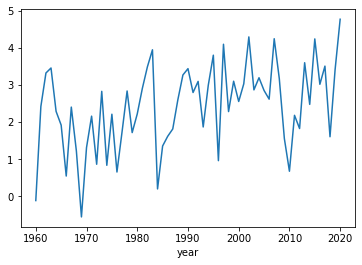

In [25]:
s_1.plot()

In [26]:
s_1.idxmax() # самый теплый год

2020

In [27]:
s_1.idxmin() # самый холодный год

1969

In [28]:
s_2 = df.groupby('year')['rainfall'].sum() 
s_2.head()

year
1960    472.7
1961    517.8
1962    368.7
1963    430.3
1964    425.3
Name: rainfall, dtype: float64

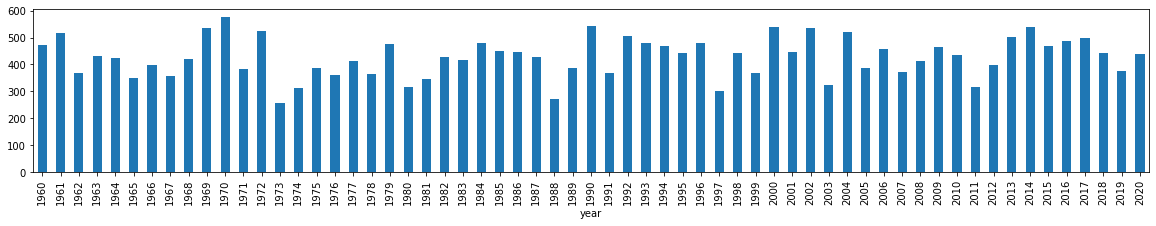

In [29]:
s_2.plot.bar(figsize = (20,3))

In [30]:
s_2.idxmax() # самый дождливый год

1970

In [31]:
s_2.idxmin() # самый засушливый год

1973

In [32]:
df[df['average_t'] < -30] # Средняя температура воздуха меньше -30

,year,month,day,min_t,average_t,max_t,rainfall,date,new,without_cond
17,1960,1,18,-31.4,-31.2,-27.2,0.0,1960-01-18,4.2,1
18,1960,1,19,-35.8,-33.2,-29.7,0.0,1960-01-19,6.1,2
323,1960,11,19,-31.3,-30.1,NaN,0.8,1960-11-19,NaN,0
361,1960,12,27,-34.2,-30.2,NaN,0.0,1960-12-27,NaN,1
373,1961,1,8,-36.2,-34.5,NaN,0.0,1961-01-08,NaN,0
...,...,...,...,...,...,...,...,...,...,...
21585,2019,2,5,-38.0,-32.0,-24.3,0.0,2019-02-05,13.7,1
21588,2019,2,8,-38.3,-32.8,-24.8,0.0,2019-02-08,13.5,4
22275,2020,12,26,-35.5,-31.6,-23.4,0.0,2020-12-26,12.1,0
22276,2020,12,27,-41.7,-36.3,-32.8,0.0,2020-12-27,8.9,1


In [33]:
df[(df['average_t'] > 27) & (df['without_cond'] > 3)] # Средняя температура воздуха выше 27 С и количество дней без осадков больше 3

,year,month,day,min_t,average_t,max_t,rainfall,date,new,without_cond
1270,1963,6,24,19.4,27.4,33.4,0.0,1963-06-24,14.0,8
2029,1965,7,22,19.8,27.3,35.0,0.0,1965-07-22,15.2,9
3471,1969,7,3,21.4,27.1,33.2,0.0,1969-07-03,11.8,4
3472,1969,7,4,22.1,28.9,35.5,0.0,1969-07-04,13.4,5
3473,1969,7,5,23.2,27.9,34.2,0.0,1969-07-05,11.0,6
5305,1974,7,11,16.9,27.8,37.9,0.0,1974-07-11,21.0,18
6381,1977,6,21,19.5,27.2,32.9,0.0,1977-06-21,13.4,24
8601,1983,7,20,20.4,27.2,33.7,0.0,1983-07-20,13.3,6
10395,1988,6,17,19.4,28.3,36.6,0.0,1988-06-17,17.2,6
11884,1992,7,15,17.9,28.0,37.1,0.0,1992-07-15,19.2,6
